In [1]:
# Exploratory Data Analysis on Cardiotocographic Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [3]:
# Load dataset
df = pd.read_csv("Cardiotocographic.csv")

# Display first few rows
display(df.head())

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
# ------------------------------
# Data Cleaning and Preparation
# ------------------------------

# Check for missing values
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])


LB          21
AC          20
DS          21
DP          21
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
# Data types check
display(df.dtypes)


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [6]:
# Describe dataset
display(df.describe())


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


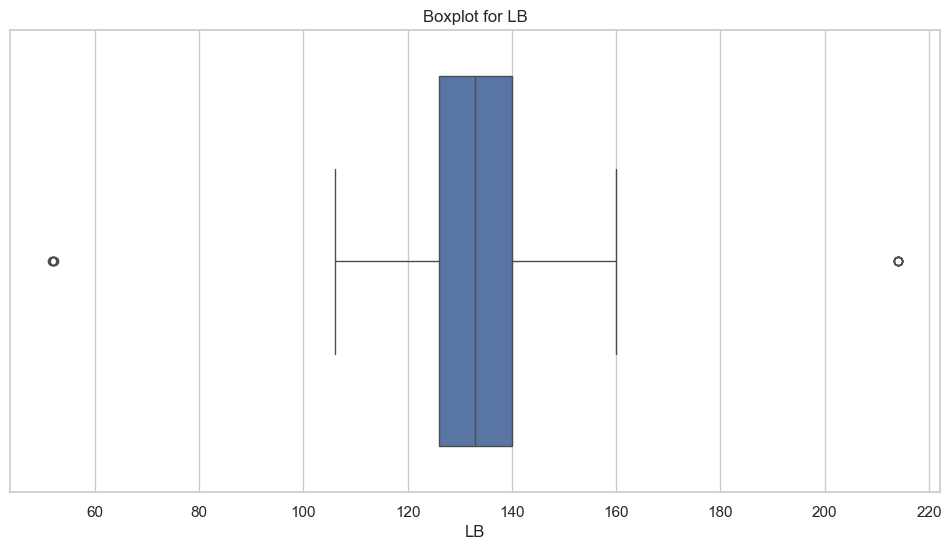

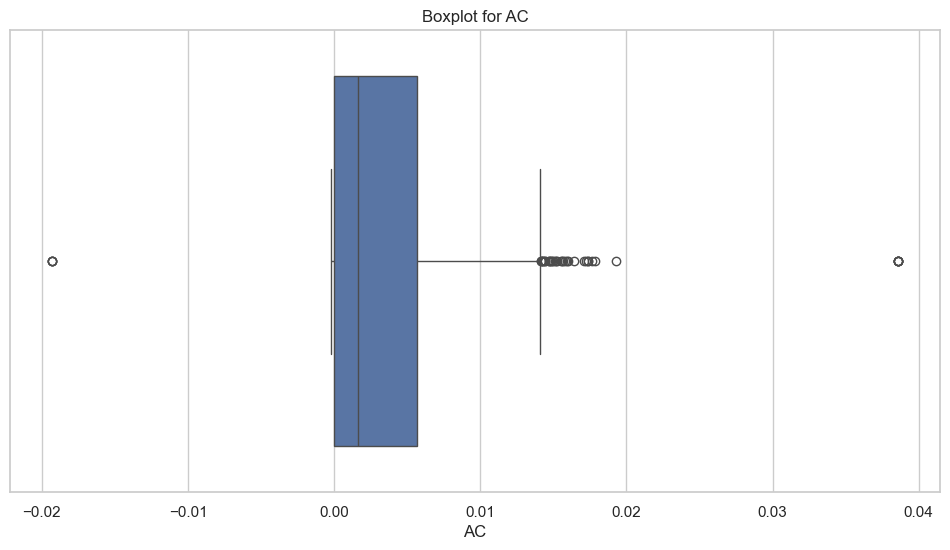

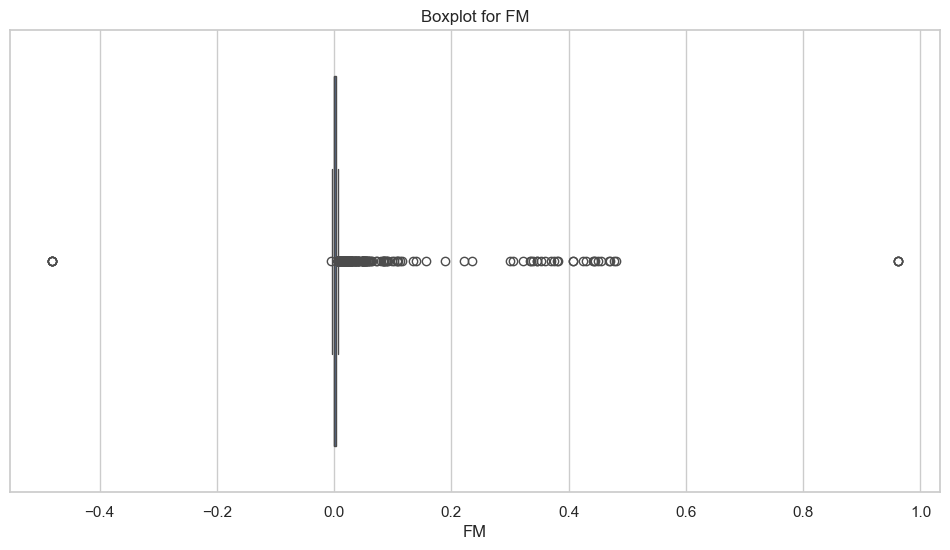

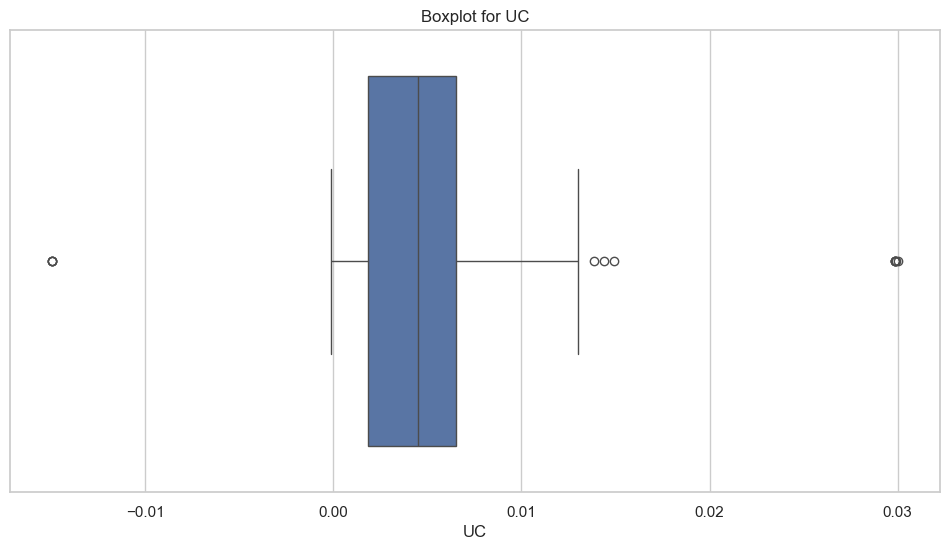

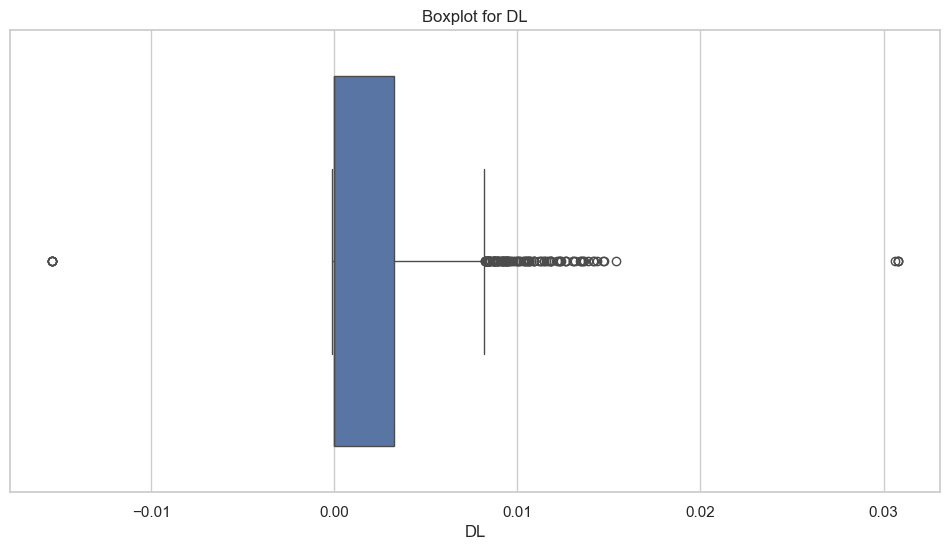

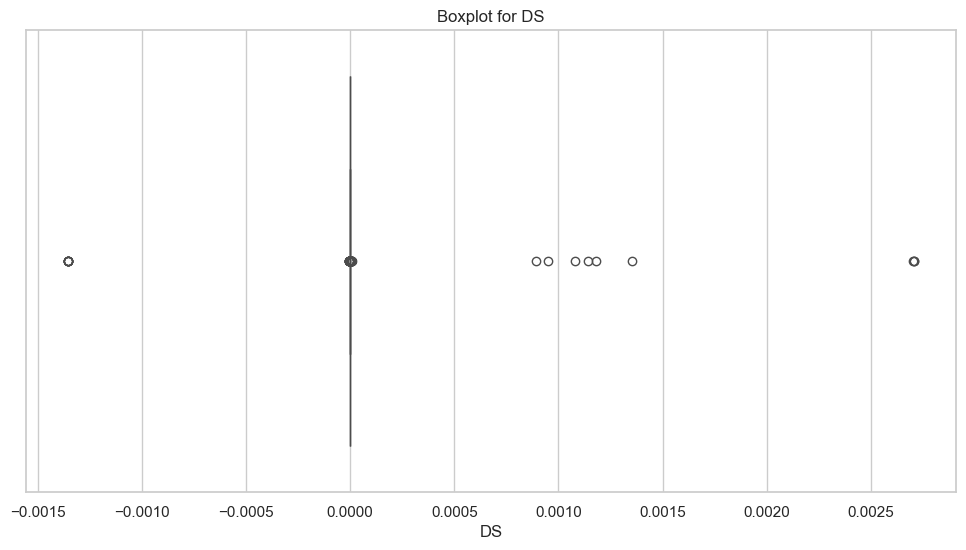

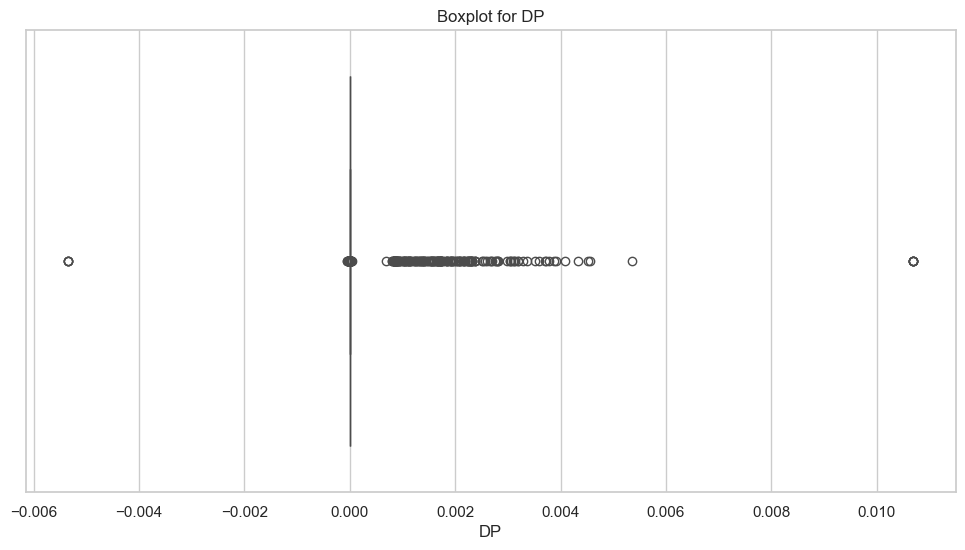

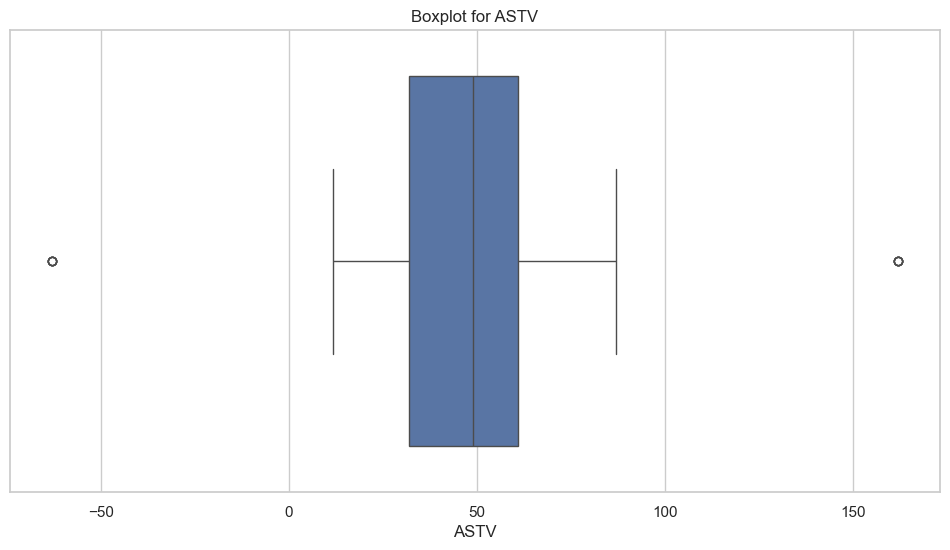

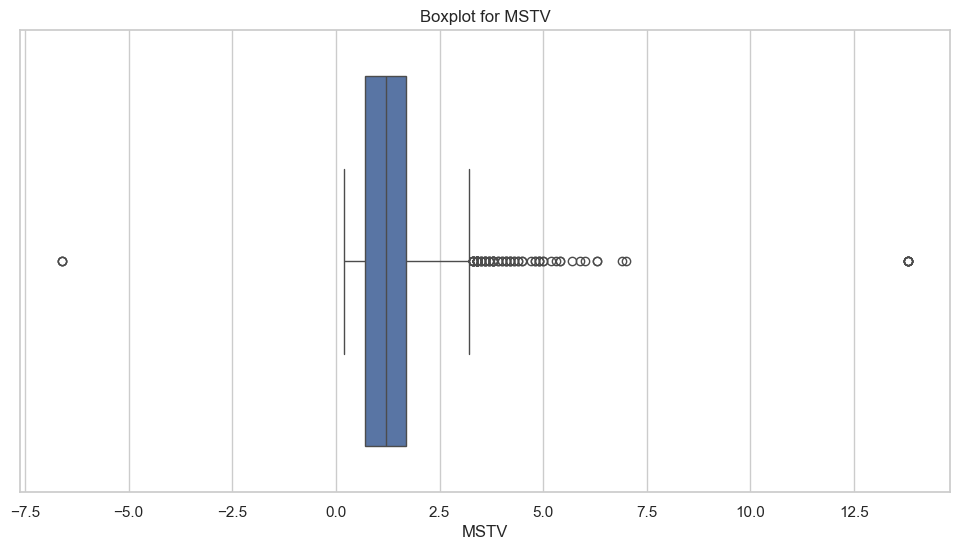

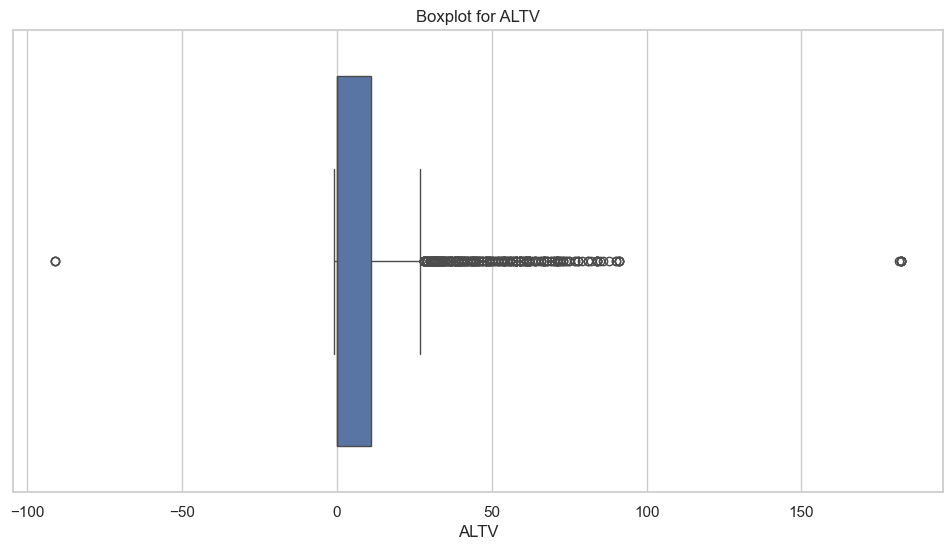

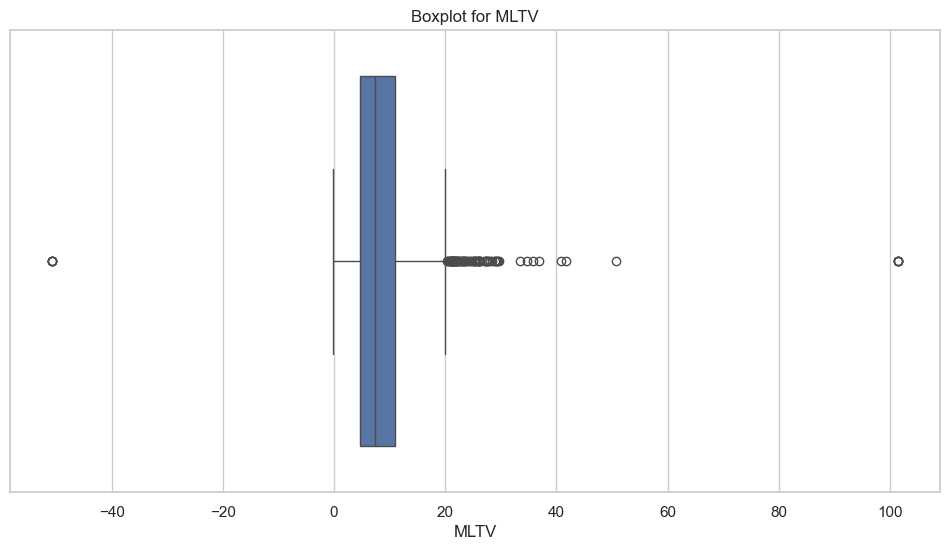

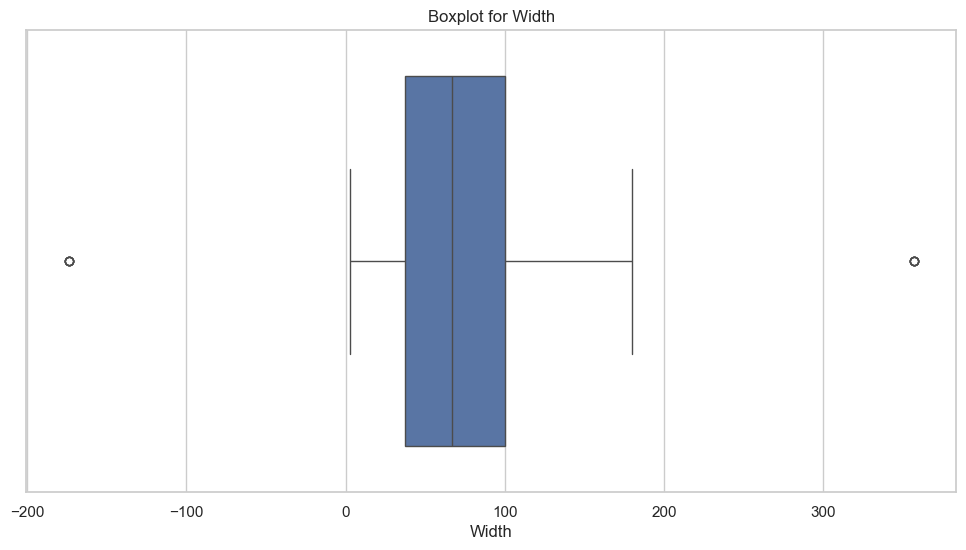

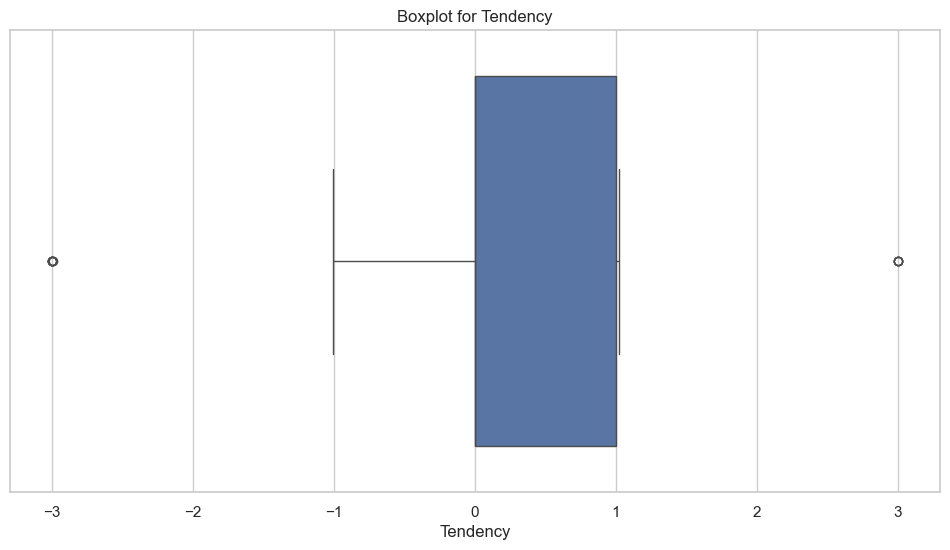

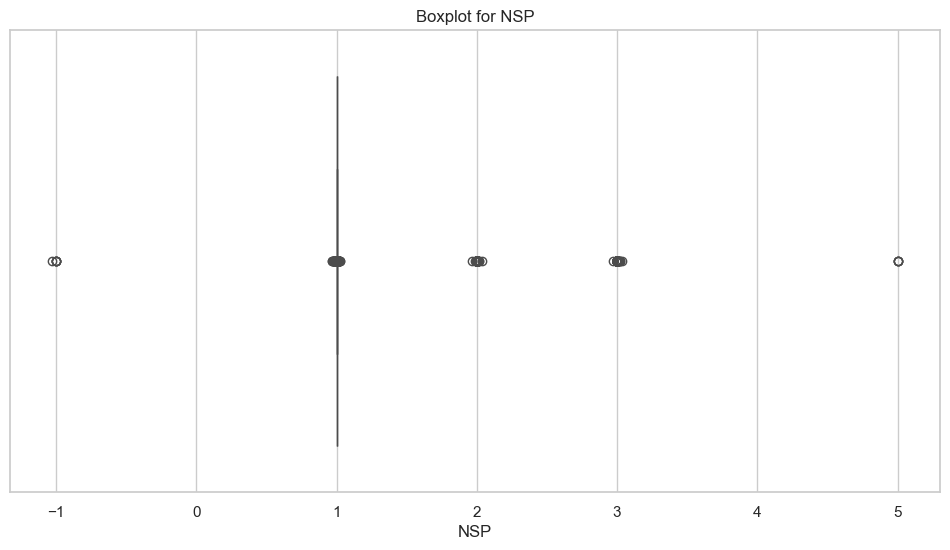

In [7]:
# ------------------------------
# Outlier Detection
# ------------------------------

# Boxplot for each column
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [10]:
# ------------------------------
# Statistical Summary
# ------------------------------

summary = df.describe().T
summary["median"] = df.median()
summary["IQR"] = df.quantile(0.75) - df.quantile(0.25)
display(summary)

,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2105.0,133.343598,11.270154,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2106.0,0.003219,0.004391,-0.019284,0.000000,0.001634,0.005650,0.038567,0.001634,0.005650
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268,0.000000,0.002567
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002,0.004484,0.004685
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769,0.000000,0.003289
DS,2105.0,0.000003,0.000142,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2105.0,0.000175,0.000840,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000


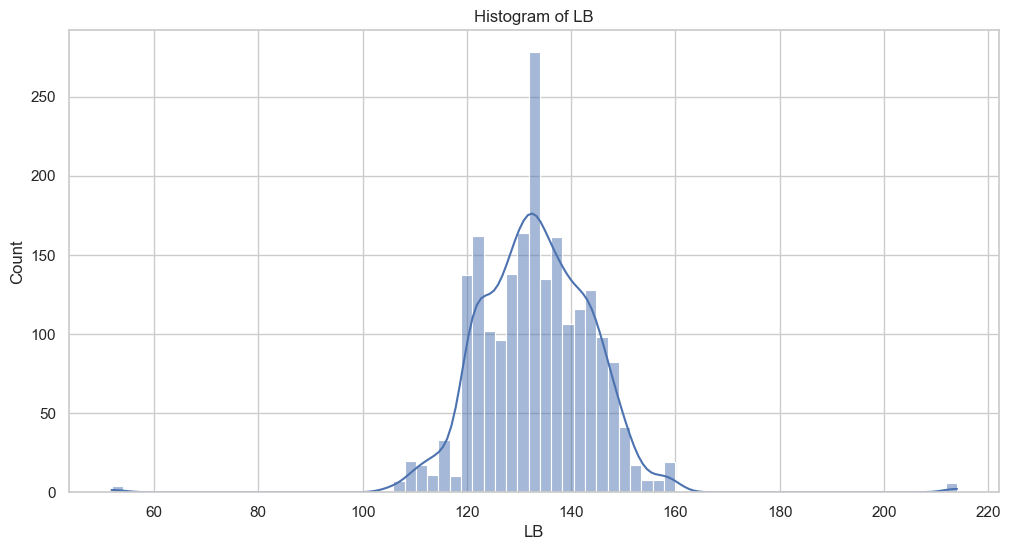

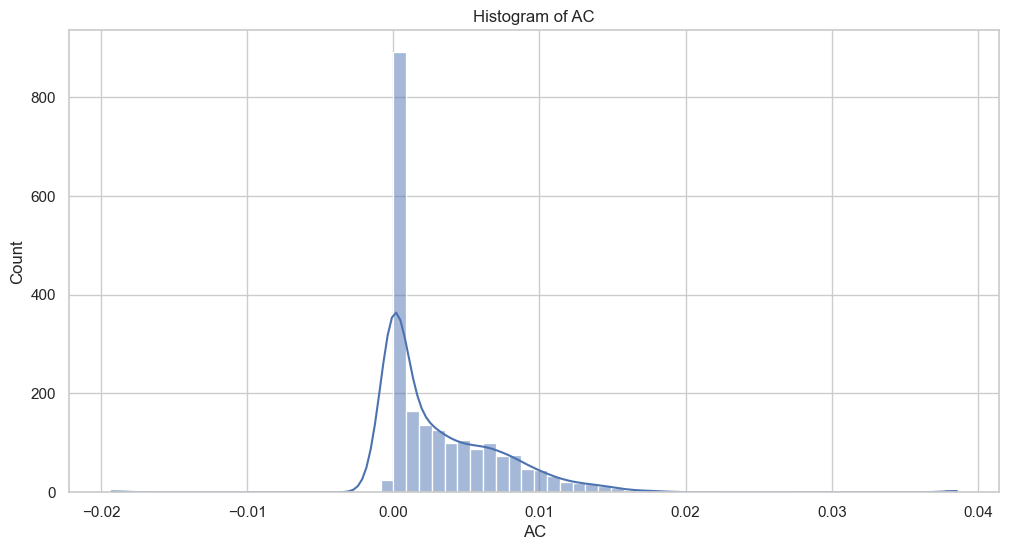

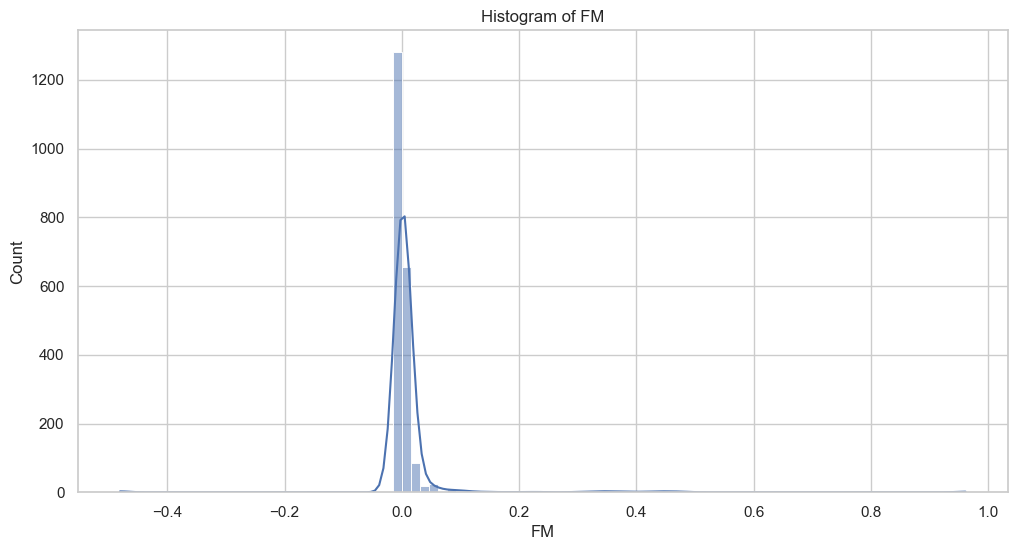

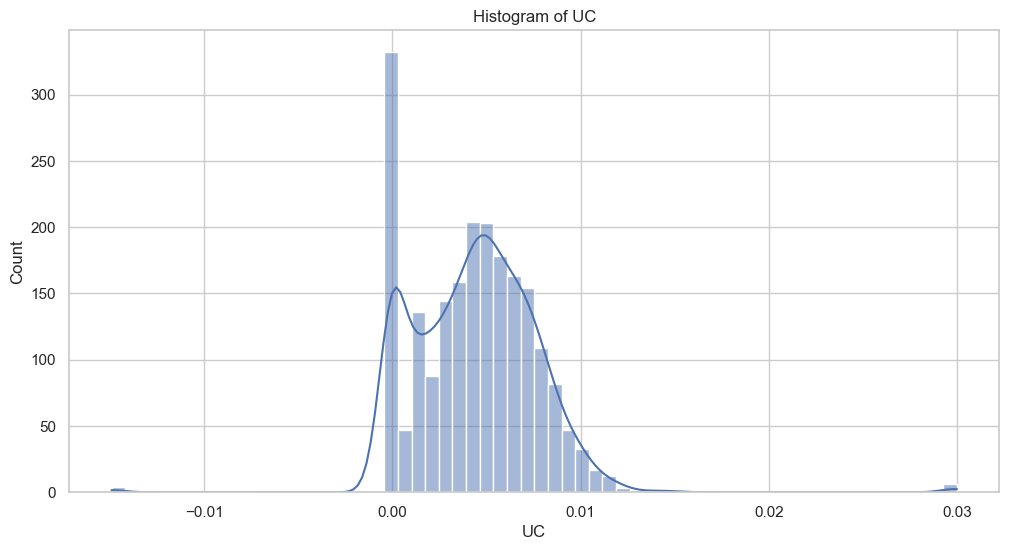

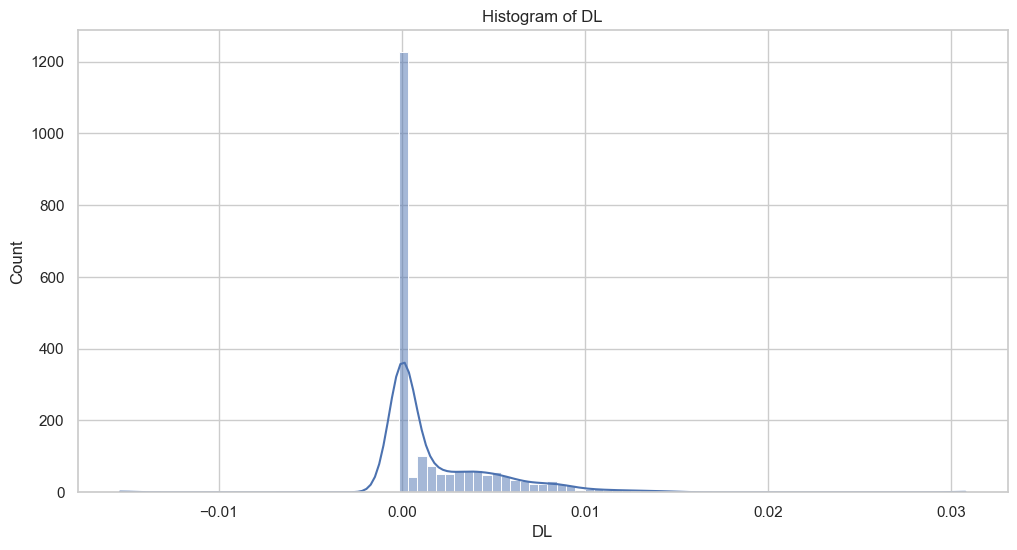

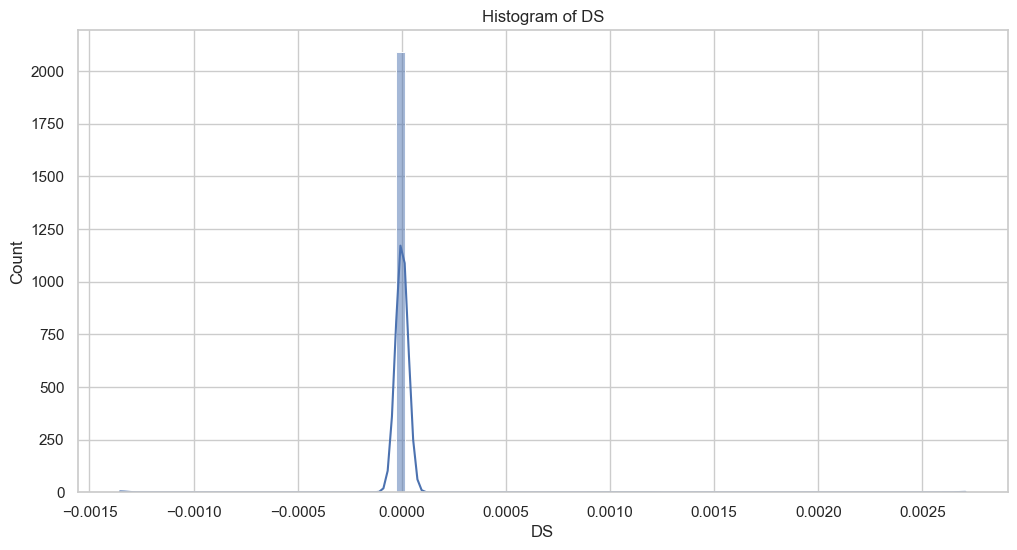

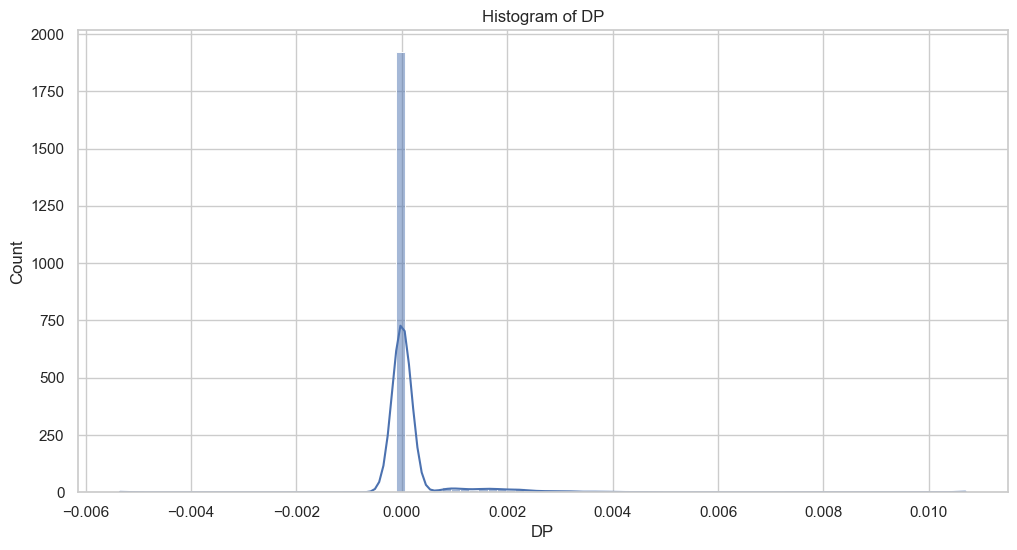

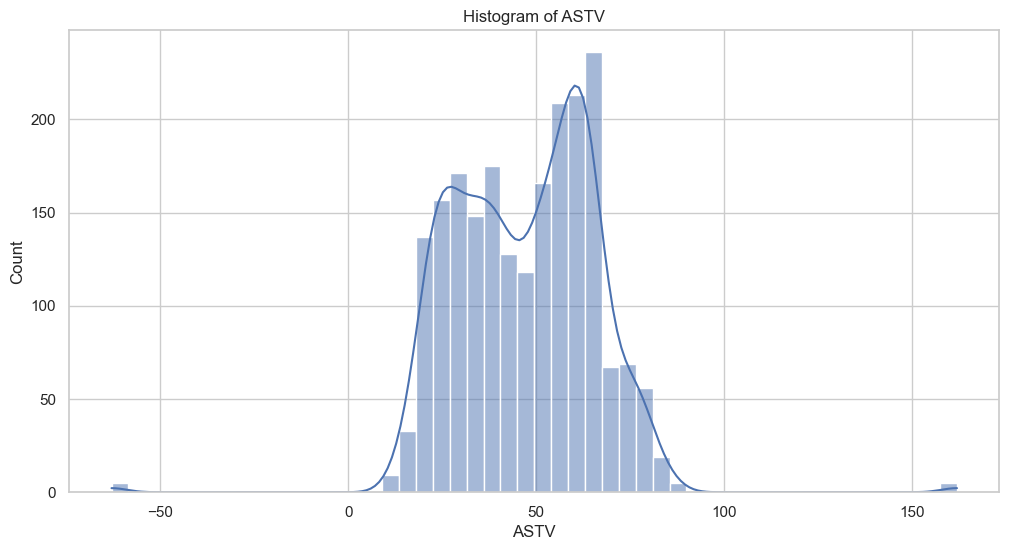

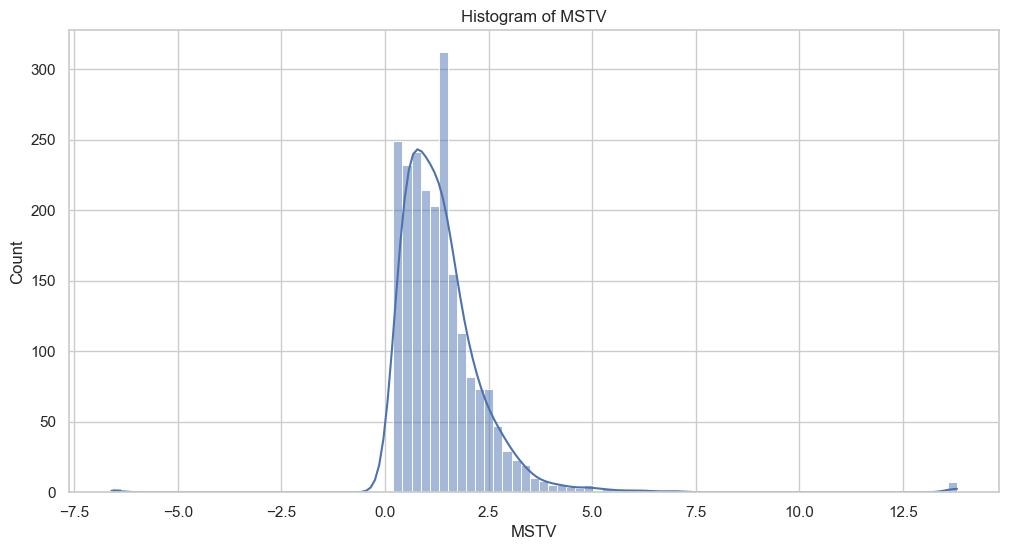

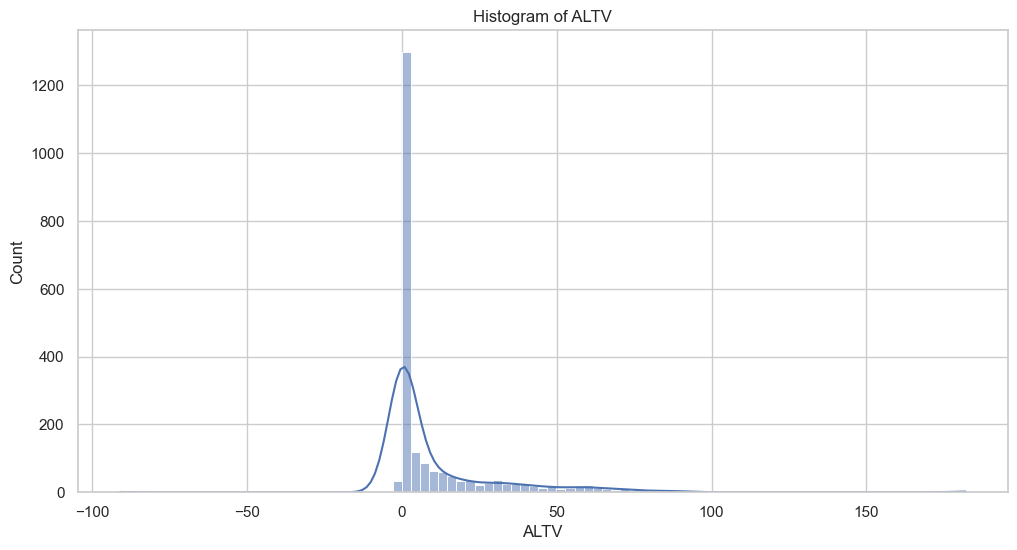

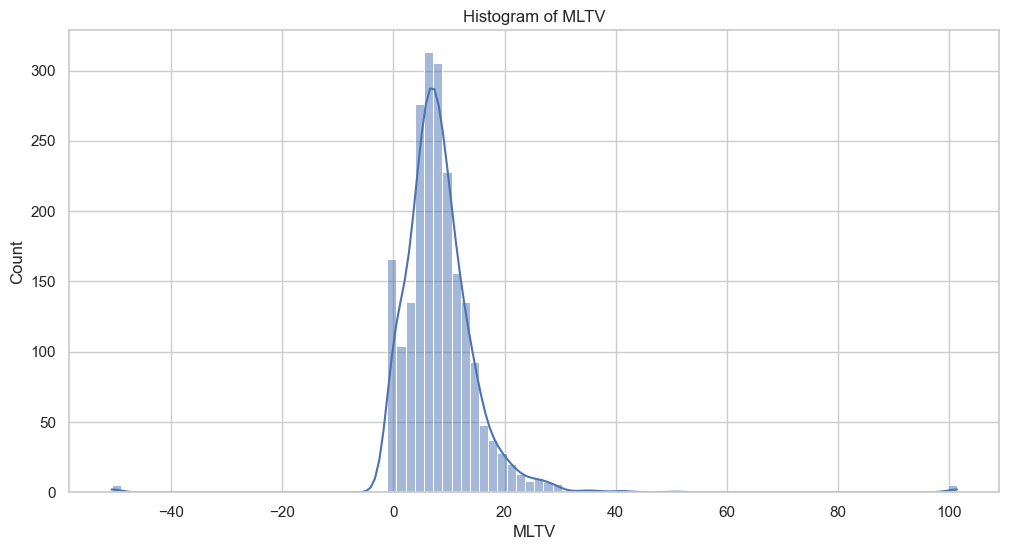

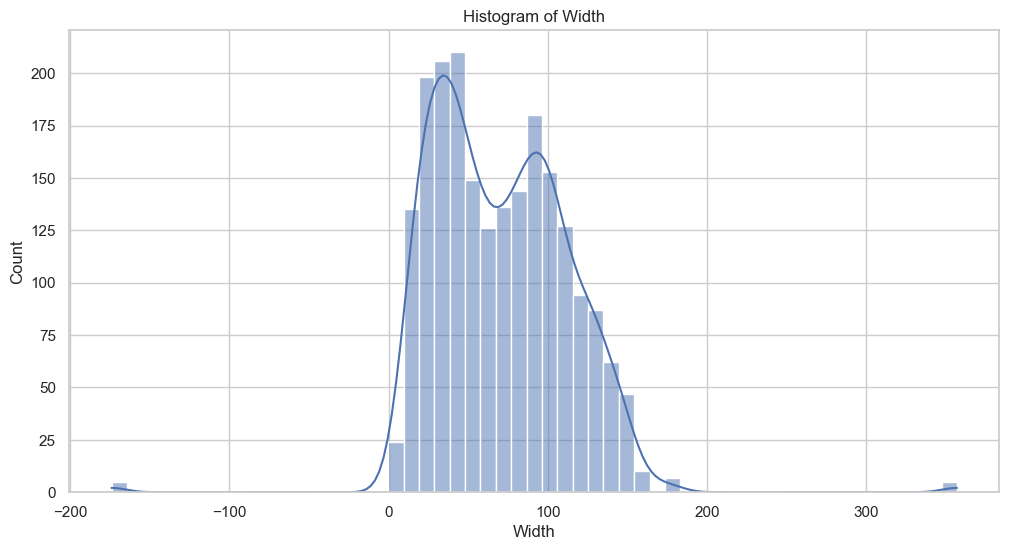

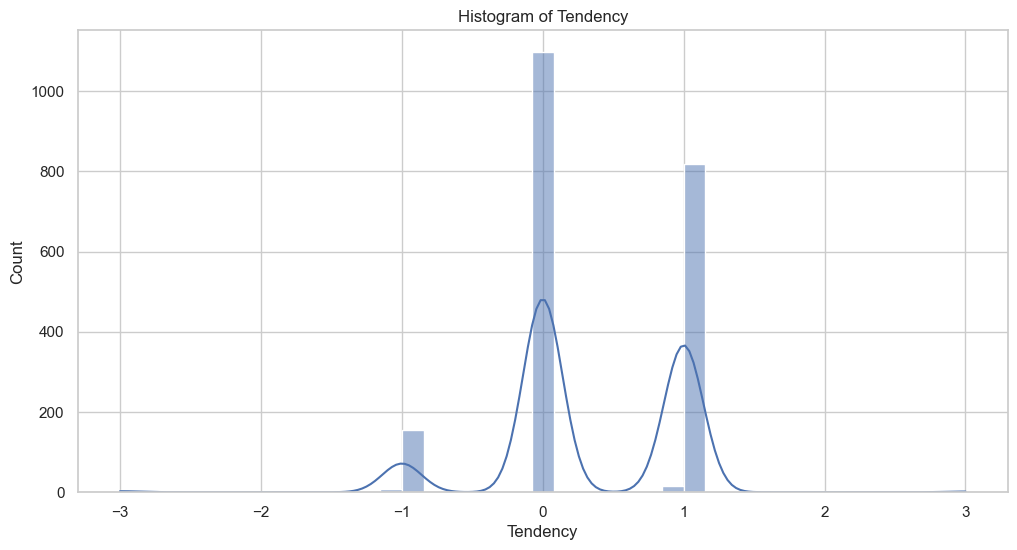

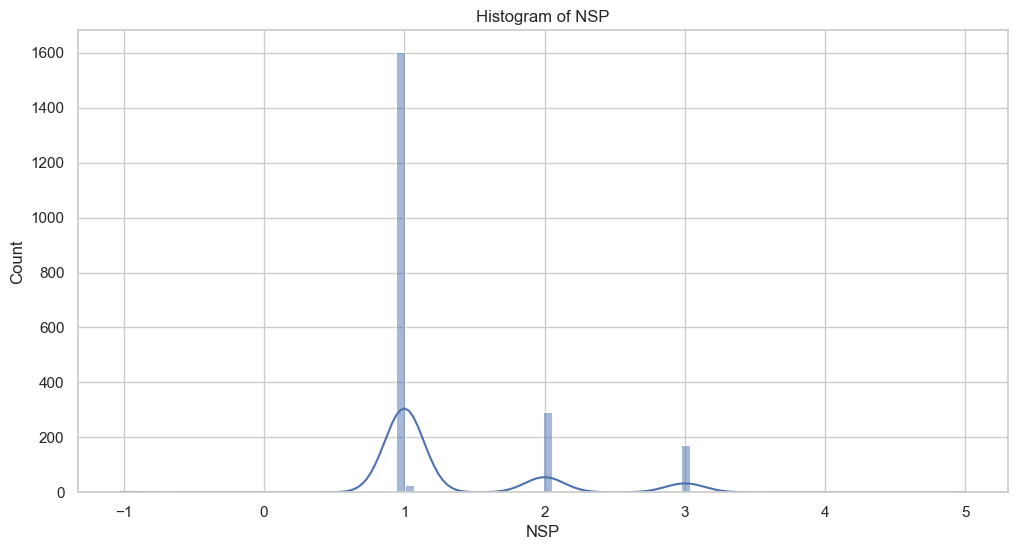

In [8]:
# ------------------------------
# Data Visualization
# ------------------------------

# Histograms
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

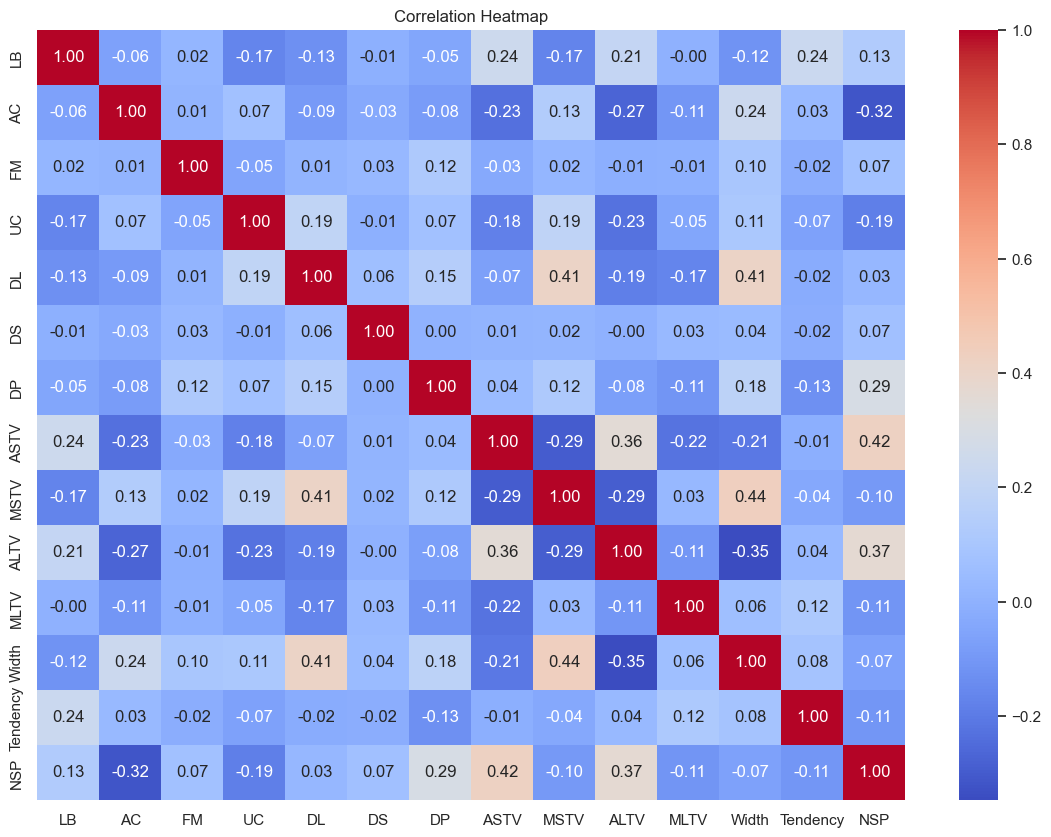

In [12]:
# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

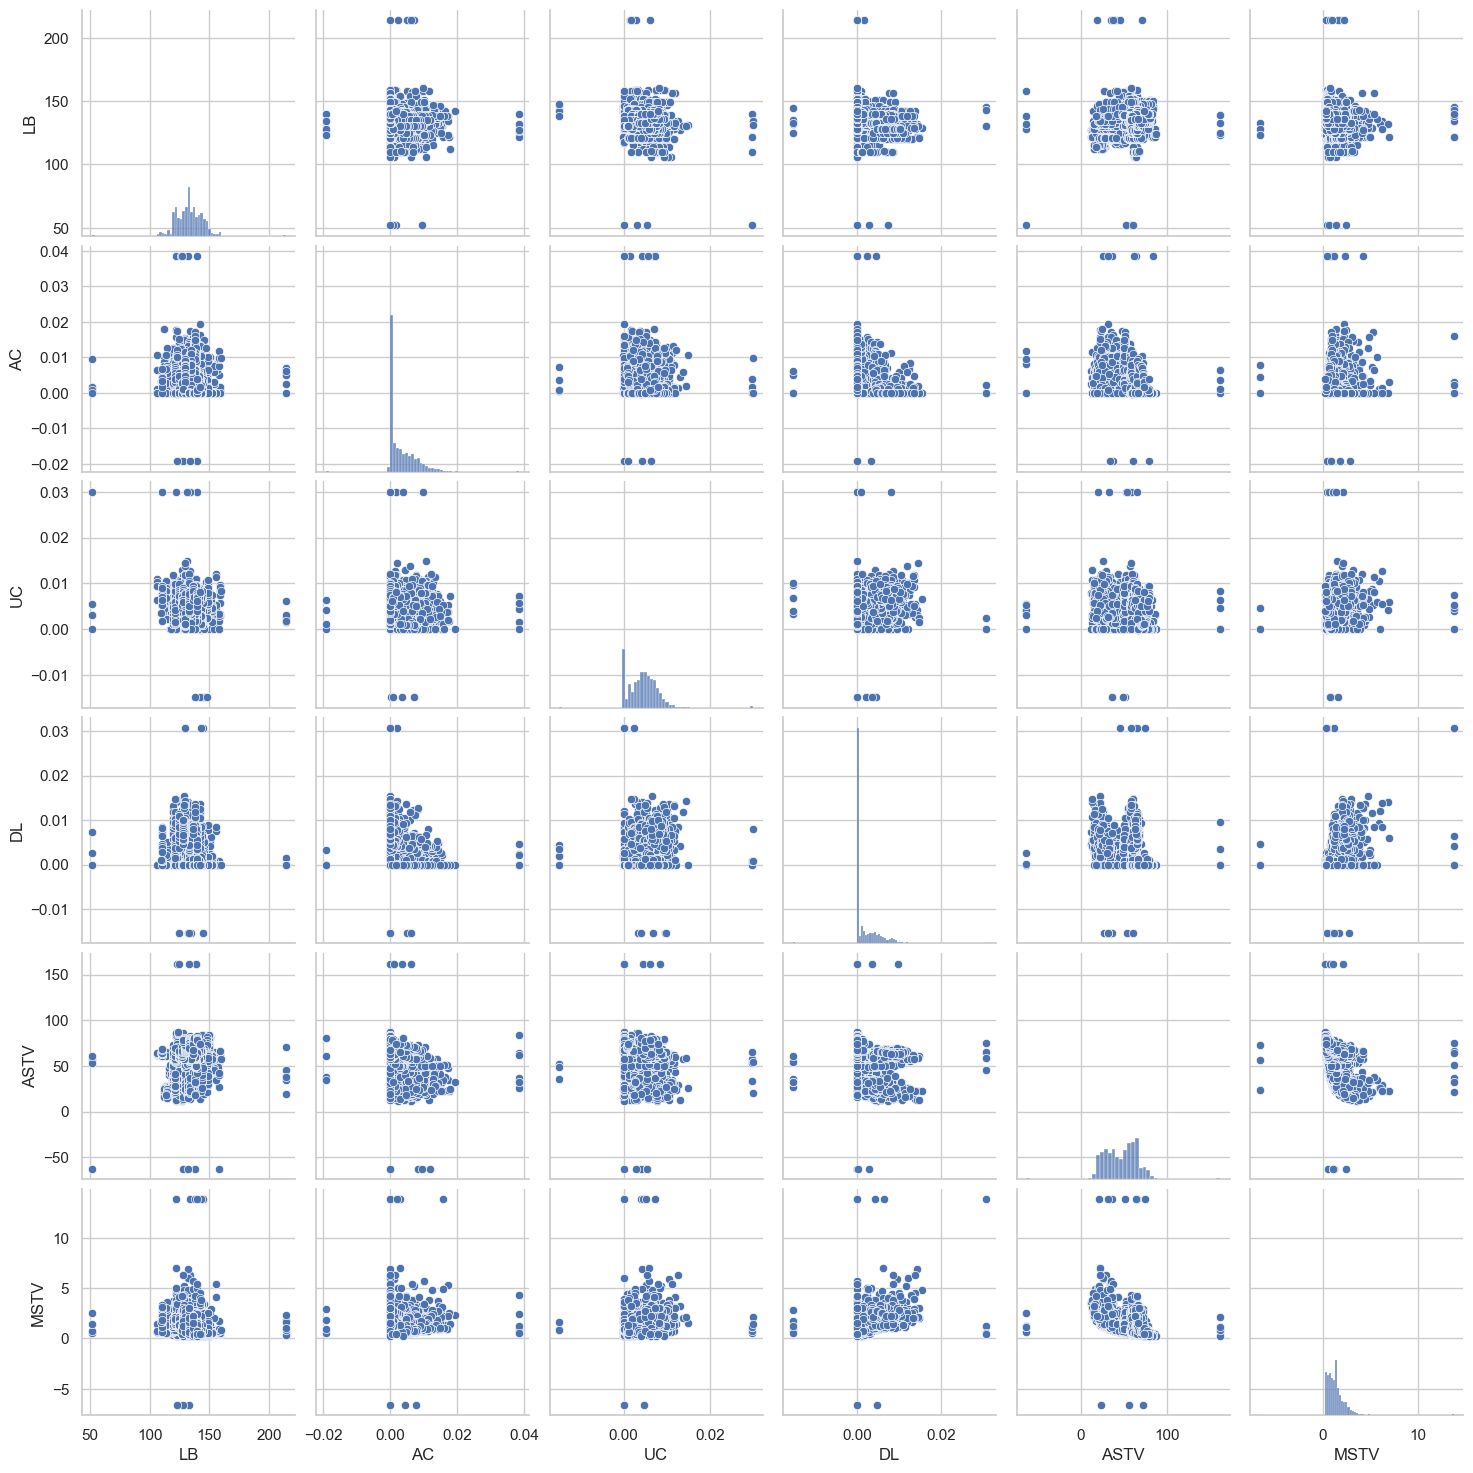

In [9]:
# Pair plot of selected features
selected_features = ["LB", "AC", "UC", "DL", "ASTV", "MSTV"]
sns.pairplot(df[selected_features])
plt.show()

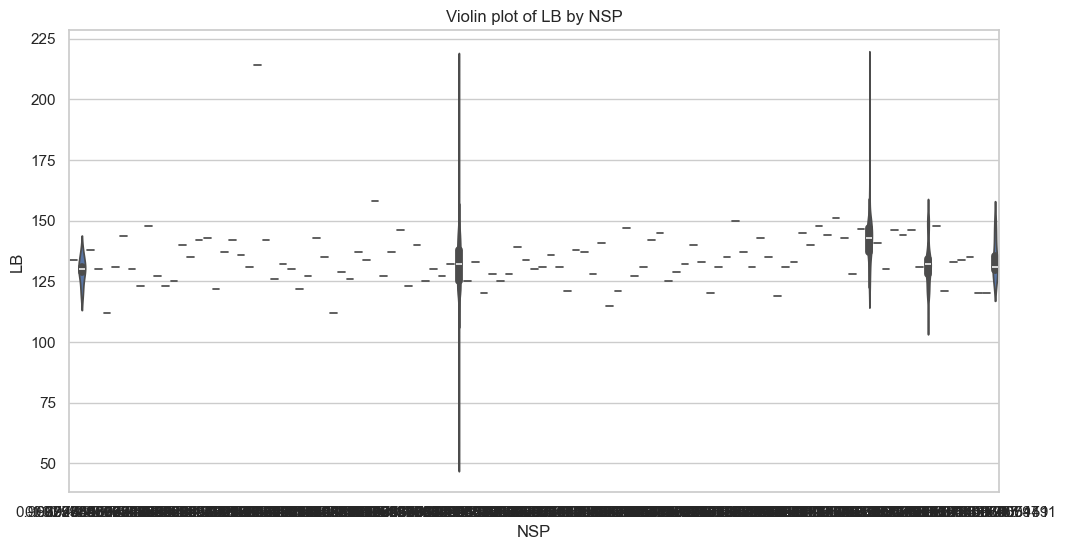

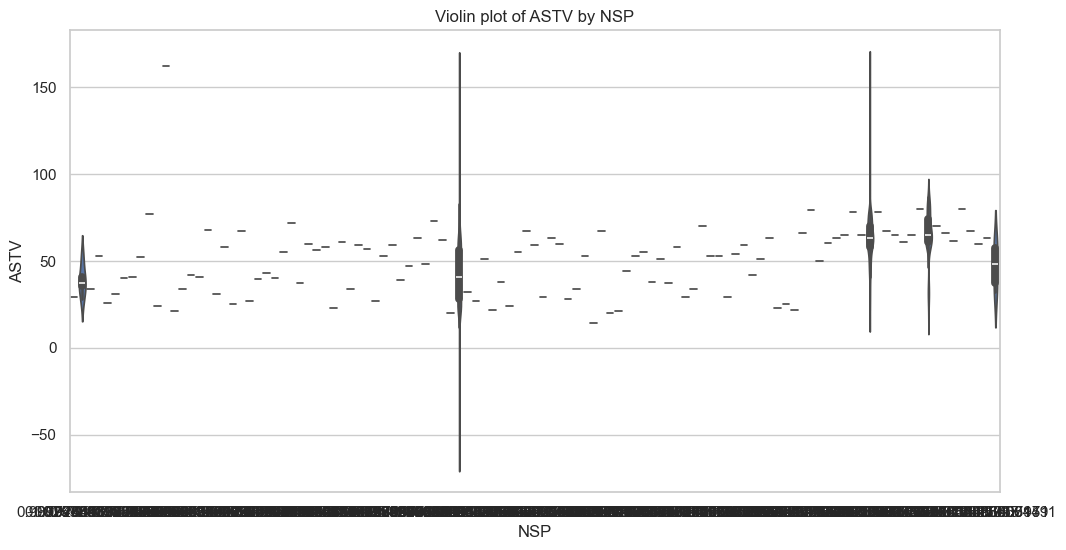

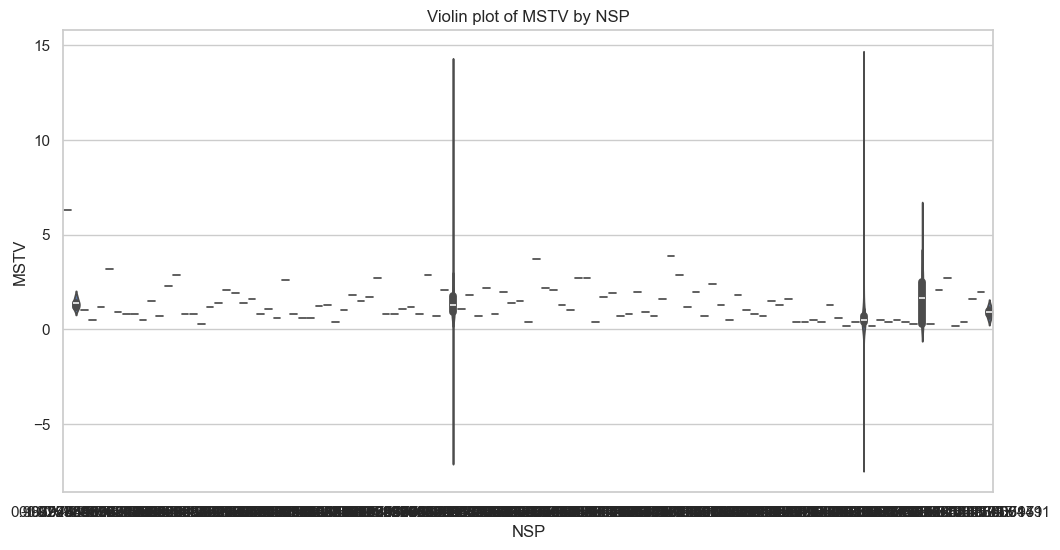

In [14]:
# Violin plots
for col in ["LB", "ASTV", "MSTV"]:
    plt.figure()
    sns.violinplot(x="NSP", y=col, data=df)
    plt.title(f'Violin plot of {col} by NSP')
    plt.show()

In [ ]:
# ------------------------------
# Insights & Conclusion
# ------------------------------

# - High ASTV may correlate with non-normal fetal state (NSP)
# - UC, DL, and other deceleration features show differences by NSP
# - Visualizations highlight potential areas for feature selection and prediction modeling
